In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [104]:
file_name = "PCOS_dataset.csv"

In [105]:
# Membaca file CSV dan menyimpan ke dalam DataFrame bernama 'df'
df = pd.read_csv("PCOS_dataset.csv")

In [106]:
# Menampilkan 5 baris pertama dari dataset untuk melihat struktur dan data awal
df = pd.read_csv("PCOS_dataset.csv")
df.head()


,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Cycle(R/I),Cycle length(days),Hip(inch),Waist(inch),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Waist:Hip Ratio
0,0,30,69.979147,167.708055,23.185569,4,5,37,32,0,1,0,0,1,0.86
1,0,36,63.711688,154.055877,25.441392,2,6,38,35,1,0,0,1,1,0.92
2,0,36,51.848631,149.059804,23.928264,4,2,40,38,0,0,0,0,0,0.95
3,1,29,66.893988,148.628036,27.894935,4,5,36,34,0,1,1,1,0,0.94
4,0,33,52.536198,150.767409,23.079564,2,5,40,33,0,0,0,0,0,0.83


In [107]:
print(df.head())

   PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)         BMI  Cycle(R/I)  \
0           0          30    69.979147   167.708055  23.185569           4   
1           0          36    63.711688   154.055877  25.441392           2   
2           0          36    51.848631   149.059804  23.928264           4   
3           1          29    66.893988   148.628036  27.894935           4   
4           0          33    52.536198   150.767409  23.079564           2   

   Cycle length(days)  Hip(inch)  Waist(inch)  Weight gain(Y/N)  \
0                   5         37           32                 0   
1                   6         38           35                 1   
2                   2         40           38                 0   
3                   5         36           34                 0   
4                   5         40           33                 0   

   hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  Pimples(Y/N)  \
0                 1                     0            

In [108]:
# Menampilkan informasi umum tentang kolom (jumlah non-null dan tipe data)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PCOS (Y/N)            2000 non-null   int64  
 1    Age (yrs)            2000 non-null   int64  
 2   Weight (Kg)           2000 non-null   float64
 3   Height(Cm)            2000 non-null   float64
 4   BMI                   2000 non-null   float64
 5   Cycle(R/I)            2000 non-null   int64  
 6   Cycle length(days)    2000 non-null   int64  
 7   Hip(inch)             2000 non-null   int64  
 8   Waist(inch)           2000 non-null   int64  
 9   Weight gain(Y/N)      2000 non-null   int64  
 10  hair growth(Y/N)      2000 non-null   int64  
 11  Skin darkening (Y/N)  2000 non-null   int64  
 12  Hair loss(Y/N)        2000 non-null   int64  
 13  Pimples(Y/N)          2000 non-null   int64  
 14  Waist:Hip Ratio       2000 non-null   float64
dtypes: float64(4), int64(

In [109]:
# Mengecek jumlah missing values (nilai kosong) pada setiap kolom
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
PCOS (Y/N)              0
 Age (yrs)              0
Weight (Kg)             0
Height(Cm)              0
BMI                     0
Cycle(R/I)              0
Cycle length(days)      0
Hip(inch)               0
Waist(inch)             0
Weight gain(Y/N)        0
hair growth(Y/N)        0
Skin darkening (Y/N)    0
Hair loss(Y/N)          0
Pimples(Y/N)            0
Waist:Hip Ratio         0
dtype: int64


In [110]:
print(df['PCOS (Y/N)'].value_counts())

PCOS (Y/N)
0    1392
1     608
Name: count, dtype: int64


In [111]:
# Menghapus kolom yang duplikat: 'Unnamed: 44' (biasanya kolom kosong)
X = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42 )

In [113]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [114]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.985
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       263
           1       1.00      0.96      0.98       137

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400



In [115]:
print("\nAkurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.985

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       263
           1       1.00      0.96      0.98       137

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400



In [116]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [117]:
if 'PCOS (Y/N)' not in df_numeric.columns:
    df_numeric['PCOS (Y/N)'] = df['PCOS (Y/N)']

In [118]:
correlation_matrix = df_numeric.corr()

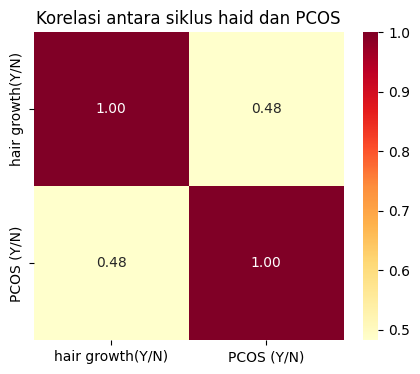

In [119]:
if 'hair growth(Y/N)' in df.columns and 'PCOS (Y/N)' in df.columns:
    corr_matrix = df[['hair growth(Y/N)', 'PCOS (Y/N)']].corr()

    plt.figure(figsize=(5, 4))
    sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', fmt='.2f')
    plt.title("Korelasi antara siklus haid dan PCOS")
    plt.show()
else:
    print("Kolom 'hair growth(Y/N)' atau 'PCOS (Y/N)' tidak ditemukan di dataset.")

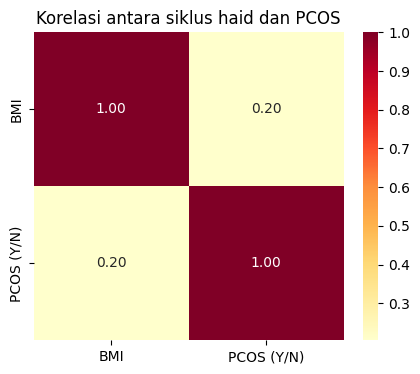

In [120]:
if 'BMI' in df.columns and 'PCOS (Y/N)' in df.columns:
    corr_matrix = df[['BMI', 'PCOS (Y/N)']].corr()

    plt.figure(figsize=(5, 4))
    sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', fmt='.2f')
    plt.title("Korelasi antara siklus haid dan PCOS")
    plt.show()
else:
    print("Kolom 'BMI' atau 'PCOS (Y/N)' tidak ditemukan di dataset.")

In [121]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation = df[numeric_cols].corr()

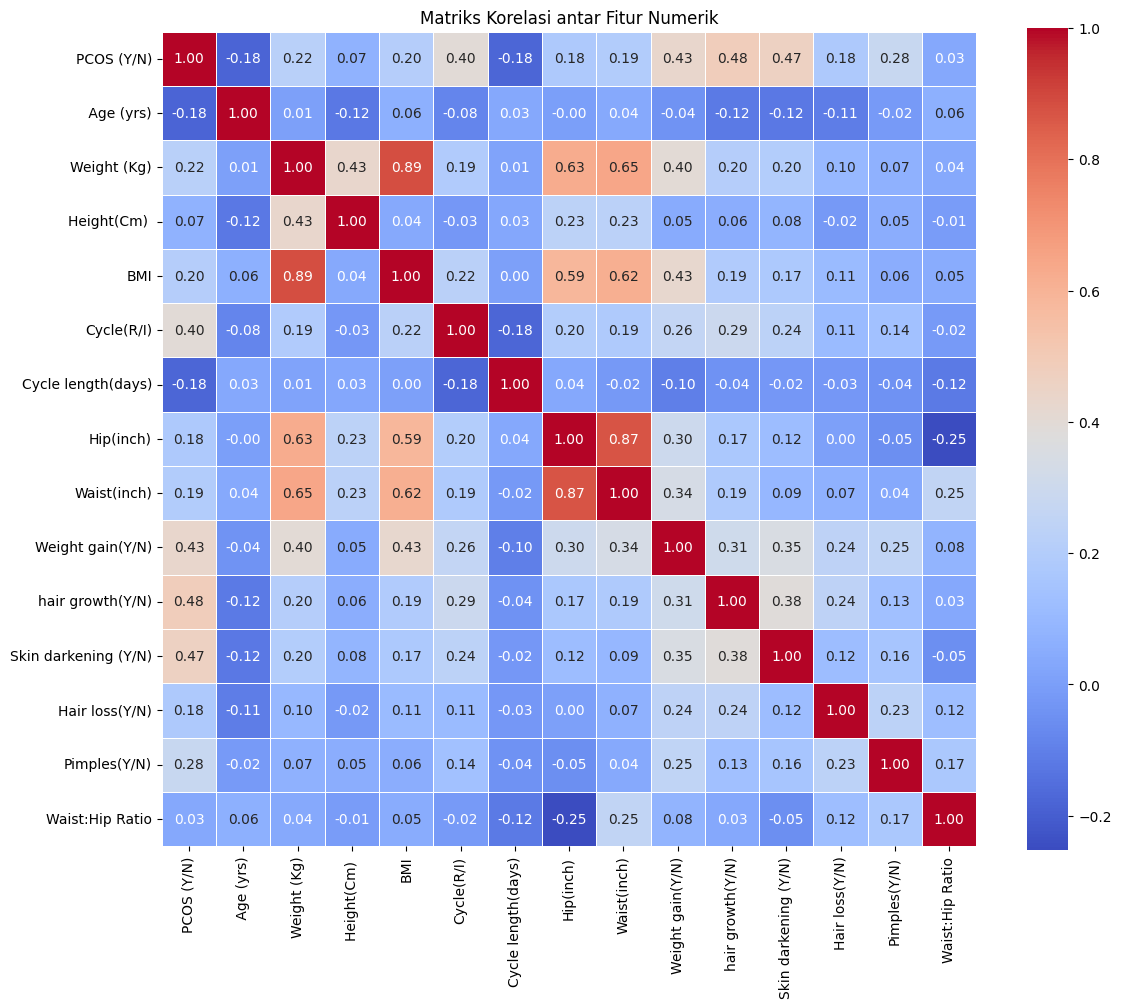

In [122]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Matriks Korelasi antar Fitur Numerik")
plt.tight_layout()
plt.show()

In [123]:
!pip install imbalanced-learn


In [124]:
from sklearn.model_selection import train_test_split

# Misal X, y sudah disiapkan dan pre‑processing sudah selesai
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [125]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

print("Distribusi setelah Oversampling:", dict(zip(*np.unique(y_ros, return_counts=True))))
# Latih model di data oversampled
model_ros = RandomForestClassifier(random_state=42)
model_ros.fit(X_ros, y_ros)


Distribusi setelah Oversampling: {np.int64(0): np.int64(1114), np.int64(1): np.int64(1114)}


RandomForestClassifier(random_state=42)

In [126]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluasi model setelah oversampling
y_pred_ros = model_ros.predict(X_test)

# Menampilkan hasil evaluasi
print("\n=== Hasil Evaluasi: Oversampling ===")
print("Akurasi  :", accuracy_score(y_test, y_pred_ros))
print(classification_report(y_test, y_pred_ros))



=== Hasil Evaluasi: Oversampling ===
Akurasi  : 0.99
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       278
           1       0.98      0.99      0.98       122

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [127]:
# 3. Split data (pastikan stratify=y agar proporsi di test set tetap sama)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [128]:
# 4. Terapkan SMOTE hanya di training set
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

print("Distribusi setelah SMOTE:", dict(zip(*np.unique(y_sm, return_counts=True))))
# Misalnya output → {0:1400, 1:1400}


Distribusi setelah SMOTE: {np.int64(0): np.int64(1114), np.int64(1): np.int64(1114)}


In [129]:
# 5. Latih ulang model di data SMOTE
model_sm = RandomForestClassifier(random_state=42)
model_sm.fit(X_sm, y_sm)

RandomForestClassifier(random_state=42)

In [130]:
y_pred = model_sm.predict(X_test)
print("\n=== Evaluasi Model dengan SMOTE ===")
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


=== Evaluasi Model dengan SMOTE ===
Akurasi: 0.9925
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       278
           1       0.98      1.00      0.99       122

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [131]:
# mendistribusikan variabel bebas
fitur_numerik = X.select_dtypes(include=['float64', 'int64']).columns

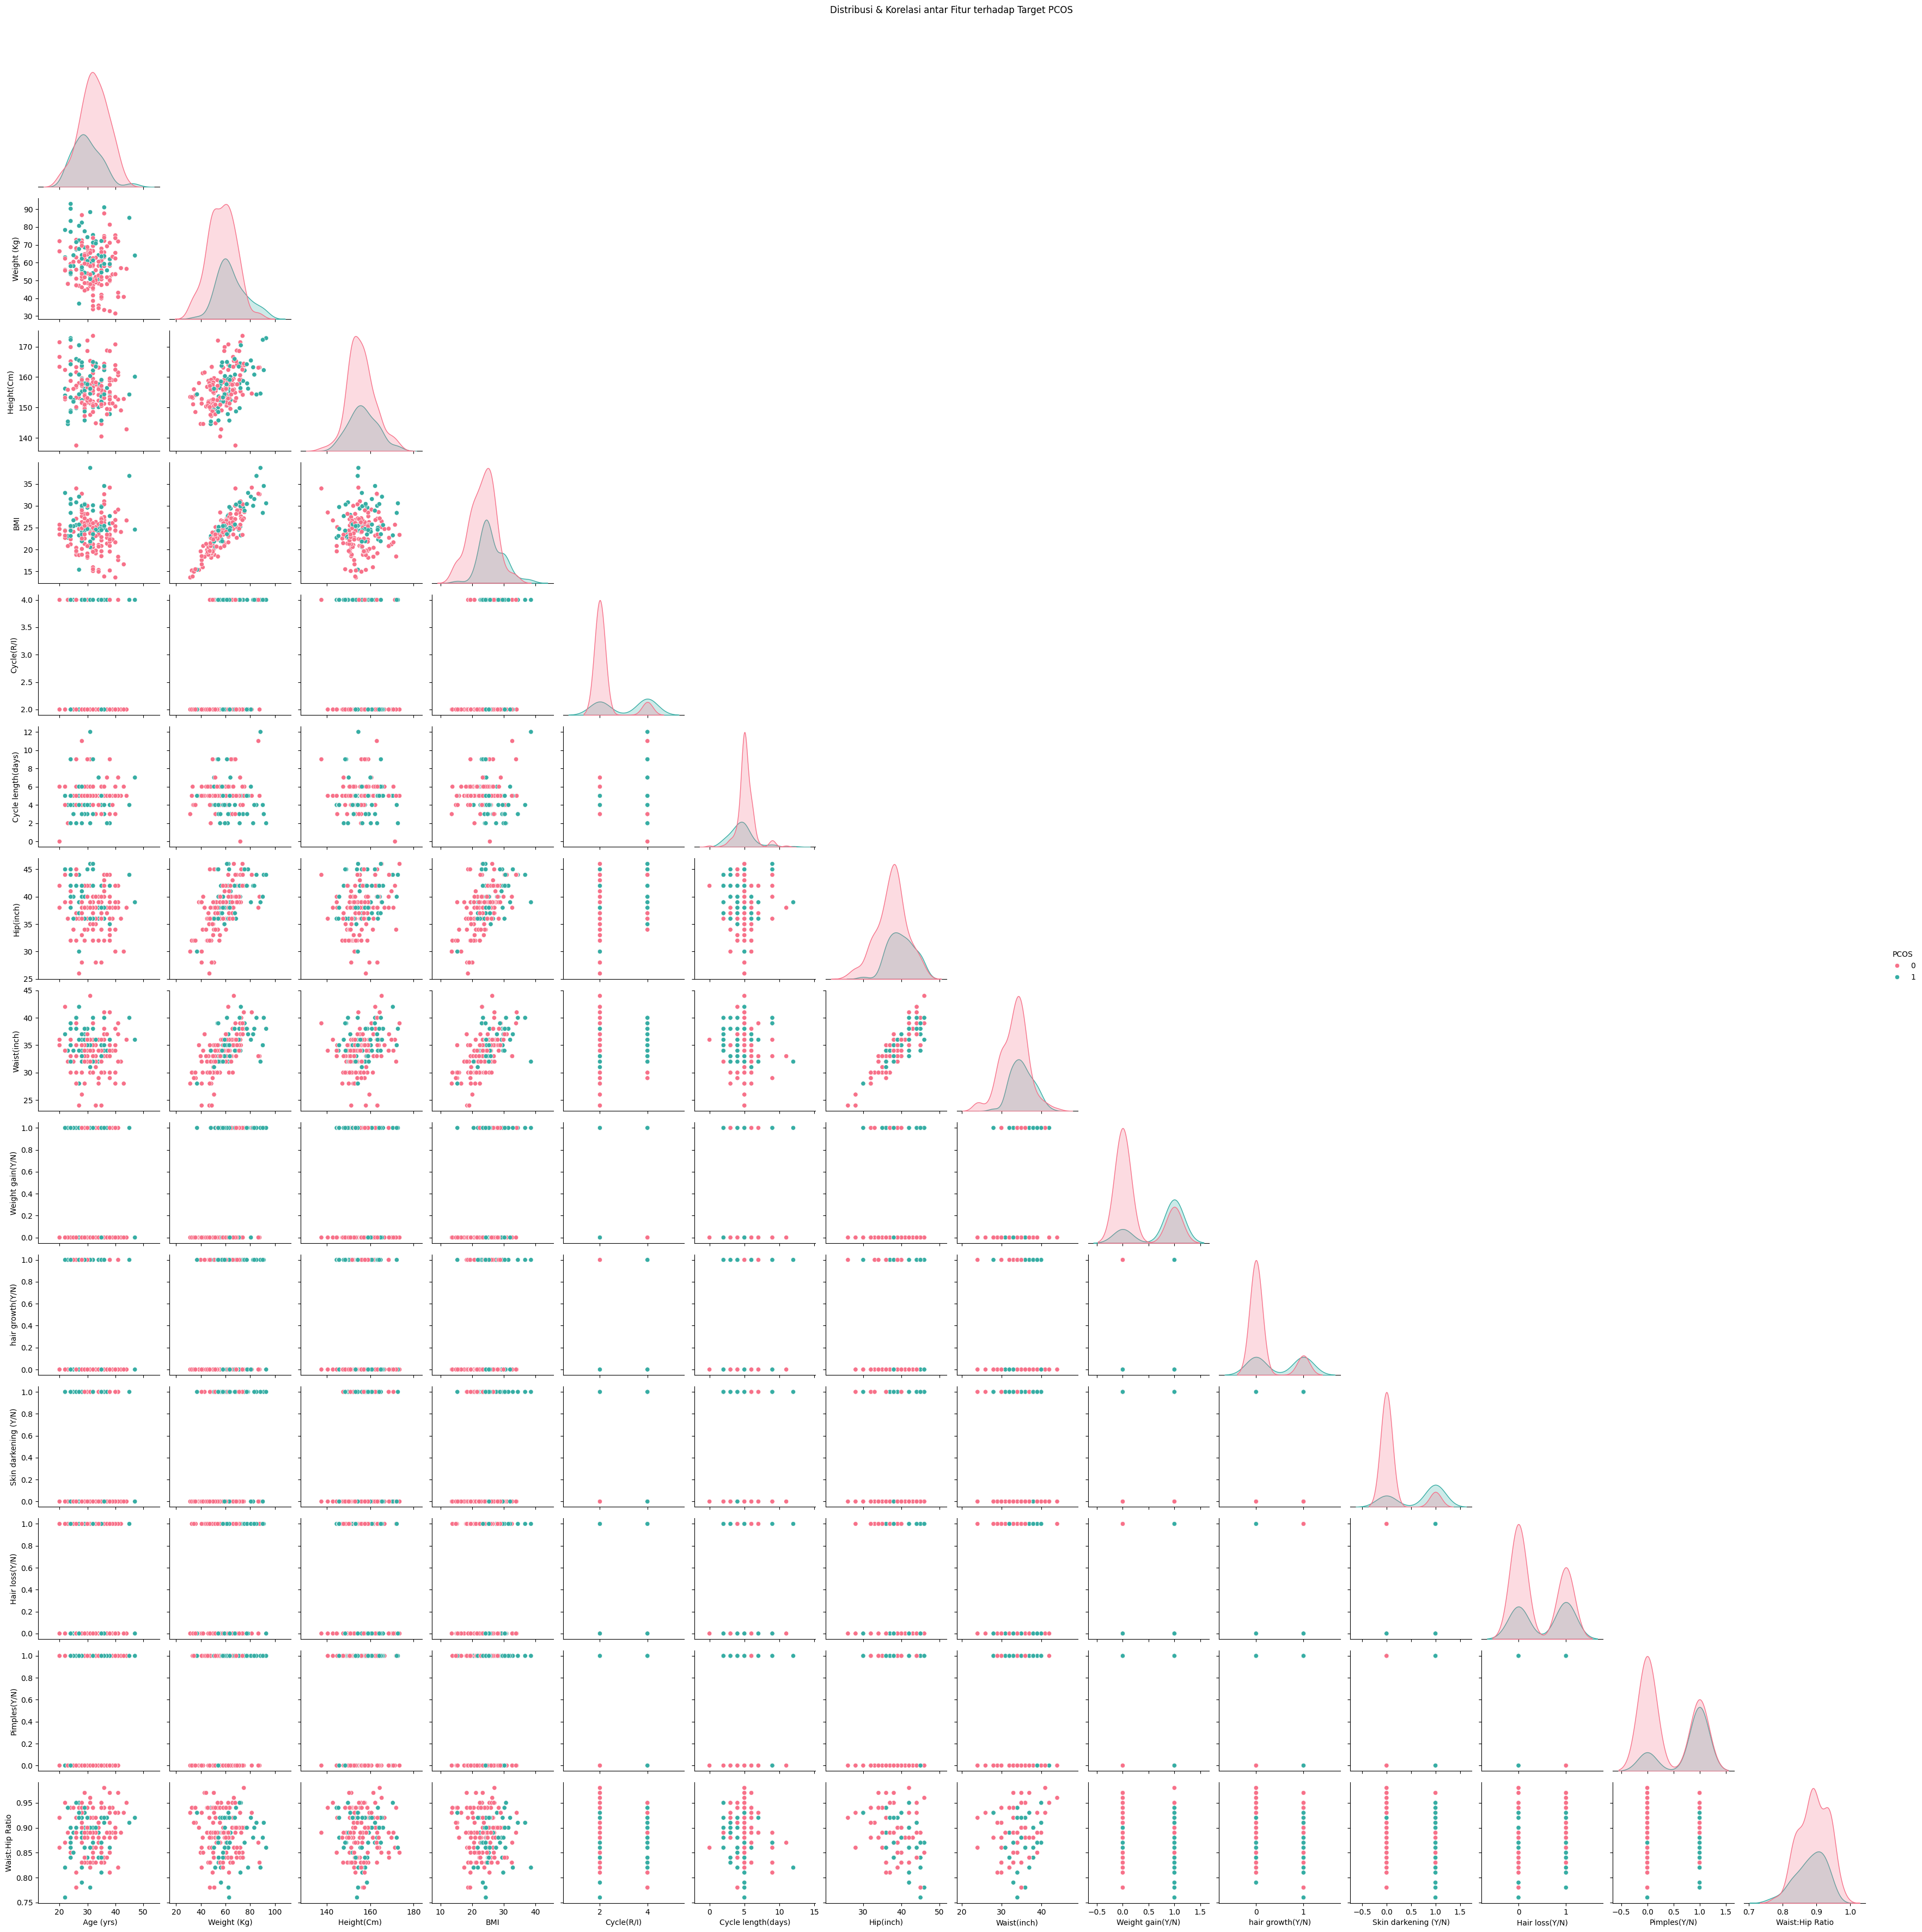

In [132]:
df_pairplot = X.copy()
df_pairplot['PCOS'] = y  # gabungkan target untuk visualisasi

sns.pairplot(df_pairplot.sample(200), hue='PCOS', corner=True, palette='husl')
plt.suptitle('Distribusi & Korelasi antar Fitur terhadap Target PCOS', y=1.02)
plt.show()


In [133]:
# Daftar fitur kategorikal yang ingin divisualisasikan
fitur_kategorikal = ['Cycle(R/I)', 'Weight gain(Y/N)', 'Hair growth(Y/N)',
                     'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)']

In [134]:
# Ukuran plot
plt.figure(figsize=(14, 12))


<Figure size 1400x1200 with 0 Axes>

<Figure size 1400x1200 with 0 Axes>

In [135]:
print(df.columns)


Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Cycle(R/I)', 'Cycle length(days)', 'Hip(inch)', 'Waist(inch)',
       'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
       'Hair loss(Y/N)', 'Pimples(Y/N)', 'Waist:Hip Ratio'],
      dtype='object')


In [136]:
fitur_kategorikal = ['Cycle', 'Weight_Gain', 'Hair_Growth',
                     'Skin_Darkening', 'Hair_Loss', 'Pimples']


In [137]:
print(fitur_kategorikal)

['Cycle', 'Weight_Gain', 'Hair_Growth', 'Skin_Darkening', 'Hair_Loss', 'Pimples']


In [138]:
# Mengisi nilai NaN dengan nilai default (misalnya 0) untuk memastikan kelengkapan data
df = df.fillna(0)

In [139]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PCOS (Y/N)            2000 non-null   int64  
 1    Age (yrs)            2000 non-null   int64  
 2   Weight (Kg)           2000 non-null   float64
 3   Height(Cm)            2000 non-null   float64
 4   BMI                   2000 non-null   float64
 5   Cycle(R/I)            2000 non-null   int64  
 6   Cycle length(days)    2000 non-null   int64  
 7   Hip(inch)             2000 non-null   int64  
 8   Waist(inch)           2000 non-null   int64  
 9   Weight gain(Y/N)      2000 non-null   int64  
 10  hair growth(Y/N)      2000 non-null   int64  
 11  Skin darkening (Y/N)  2000 non-null   int64  
 12  Hair loss(Y/N)        2000 non-null   int64  
 13  Pimples(Y/N)          2000 non-null   int64  
 14  Waist:Hip Ratio       2000 non-null   float64
dtypes: float64(4), int64(

In [140]:
# Menghitung jumlah baris duplikat sebelum dihapus
total_duplicates = df.duplicated().sum()
print("Total baris duplikat:", total_duplicates)


Total baris duplikat: 0


In [141]:
df = pd.read_csv("PCOS_dataset.csv")

In [142]:
# Asumsikan df adalah dataframe awal
df_clean = df.copy()

In [143]:
# ===== Cleaning Data =====
# Mengisi nilai NaN dengan nilai default (misalnya 0)
df_clean = df_clean.fillna(0)

In [144]:
# Menghapus baris duplikat
df_clean = df_clean.drop_duplicates()
total_duplicates = df.duplicated().sum()
print("Total baris duplikat:", total_duplicates)

Total baris duplikat: 0


In [145]:
# Menghapus baris duplikat
df_clean = df_clean.drop_duplicates()
total_duplicates = df.duplicated().sum()
print("Total baris duplikat:", total_duplicates)

# ===== Pengkodean Fitur =====
# Label Encoding untuk kolom biner
label_encoder = LabelEncoder()
binary_cols = [
    'Cycle(R/I)',            # Regular / Irregular
    'Weight gain(Y/N)',      # Yes / No
    'hair growth(Y/N)',      # Yes / No
    'Skin darkening (Y/N)',  # Yes / No
    'Hair loss(Y/N)',        # Yes / No
    'Pimples(Y/N)'           # Yes / No
]

for col in binary_cols:
    df_clean[col] = label_encoder.fit_transform(df_clean[col])

Total baris duplikat: 0


In [146]:
# Menyimpan hasil ke df_encoded (opsional, atau gunakan df_clean langsung)
df_encoded = df_clean.copy()

In [147]:
# Menyalin dataframe untuk menjaga data asli
df_encoded = df_clean.copy()

In [148]:
# Kolom-kolom biner yang akan di-encode
binary_cols = [
    'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
    'Hair loss(Y/N)', 'Pimples(Y/N)'
]

In [149]:
# Melakukan Label Encoding
label_encoder = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

In [150]:
# Tampilkan sebagian hasil encoding seperti contoh
print(df_encoded[['Weight gain(Y/N)', 'hair growth(Y/N)',
                  'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)']].head(10))

   Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  \
0                 0                 1                     0               0   
1                 1                 0                     0               1   
2                 0                 0                     0               0   
3                 0                 1                     1               1   
4                 0                 0                     0               0   
5                 1                 0                     0               0   
6                 1                 0                     0               1   
7                 0                 1                     1               0   
8                 0                 1                     1               0   
9                 0                 0                     0               0   

   Pimples(Y/N)  
0             1  
1             1  
2             0  
3             0  
4             0  
5             1  
6   

In [151]:
# Ubah nilai R/I menjadi 0 dan 1
df_encoded['Cycle(R/I)'] = df_encoded['Cycle(R/I)'].map({'R': 0, 'I': 1})


In [152]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['Cycle(R/I)'] = le.fit_transform(df_encoded['Cycle(R/I)'])


In [153]:
# Cek hasil mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))

{np.float64(nan): np.int64(0)}


In [154]:
# Tampilkan tabel 10 baris pertama dari kolom-kolom yang diminta
tabel = df_encoded[['Weight gain(Y/N)', 'hair growth(Y/N)',
                    'Skin darkening (Y/N)', 'Hair loss(Y/N)',
                    'Pimples(Y/N)', 'Cycle(R/I)']].head(10)

# Tampilkan dalam bentuk tabel
print("Tabel Hasil Encoding (10 Baris Pertama):")
print(tabel.to_string(index=True))

Tabel Hasil Encoding (10 Baris Pertama):
   Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  Pimples(Y/N)  Cycle(R/I)
0                 0                 1                     0               0             1           0
1                 1                 0                     0               1             1           0
2                 0                 0                     0               0             0           0
3                 0                 1                     1               1             0           0
4                 0                 0                     0               0             0           0
5                 1                 0                     0               0             1           0
6                 1                 0                     0               1             1           0
7                 0                 1                     1               0             1           0
8                 0                 1    

In [155]:
# 1. Salin DataFrame hasil cleaning agar data asli tetap utuh
df_scaled = df_clean.copy()

In [156]:
# 2. Simpan kolom target (PCOS) sebelum scaling
target = df_scaled['PCOS (Y/N)']


In [157]:
# 3. Tentukan kolom yang akan di‐scale (semua kecuali target)
columns_to_scale = [col for col in df_scaled.columns if col != 'PCOS (Y/N)']

In [158]:
# 4. Buat dan fit‐transform data menggunakan StandardScaler
scaler = StandardScaler()
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

In [159]:
# 5. Masukkan kembali kolom target tanpa di‐scale
df_scaled['PCOS (Y/N)'] = target

In [160]:
# 6. Cek hasilnya: mean ≈ 0, std ≈ 1 untuk tiap fitur
print(df_scaled[columns_to_scale].describe().loc[['mean','std']])

         Age (yrs)   Weight (Kg)   Height(Cm)            BMI    Cycle(R/I)  \
mean  1.447731e-16  1.785239e-16  1.726619e-15 -3.463896e-16 -4.618528e-17   
std   1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   

      Cycle length(days)     Hip(inch)   Waist(inch)  Weight gain(Y/N)  \
mean       -1.030287e-16  6.483702e-17  4.520828e-16     -1.110223e-16   
std         1.000250e+00  1.000250e+00  1.000250e+00      1.000250e+00   

      hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  Pimples(Y/N)  \
mean     -3.019807e-17          3.907985e-17   -3.019807e-17  6.394885e-17   
std       1.000250e+00          1.000250e+00    1.000250e+00  1.000250e+00   

      Waist:Hip Ratio  
mean     1.509903e-15  
std      1.000250e+00  


In [161]:
# Menampilkan statistik hanya untuk kolom yang telah di-scale
full_stats = df_scaled[columns_to_scale].describe().T
full_stats

,count,mean,std,min,25%,50%,75%,max
Age (yrs),2000.0,1.447731e-16,1.00025,-2.083893,-0.615587,-0.064973,0.669180,3.055177
Weight (Kg),2000.0,1.785239e-16,1.00025,-2.515904,-0.636092,-0.086384,0.523708,4.706375
Height(Cm),2000.0,1.726619e-15,1.00025,-3.289475,-0.702888,0.002843,0.603749,3.967087
BMI,2000.0,-3.463896e-16,1.00025,-2.988280,-0.609622,-0.023045,0.560685,3.913006
Cycle(R/I),2000.0,-4.618528e-17,1.00025,-0.601275,-0.601275,-0.601275,1.638111,3.877497
Cycle length(days),2000.0,-1.030287e-16,1.00025,-3.496265,0.019336,0.019336,0.019336,4.941177
Hip(inch),2000.0,6.483702e-17,1.00025,-3.007962,-0.500387,0.001128,0.502643,2.508703
Waist(inch),2000.0,4.520828e-16,1.00025,-2.721535,-0.492824,0.064354,0.621532,3.686010
Weight gain(Y/N),2000.0,-1.110223e-16,1.00025,-0.783712,-0.783712,-0.783712,1.275978,1.275978
hair growth(Y/N),2000.0,-3.019807e-17,1.00025,-0.615110,-0.615110,-0.615110,1.625727,1.625727


In [162]:
# Pisahkan fitur dan target dari dataset PCOS
X = df_scaled.drop(columns=['PCOS (Y/N)'])  # semua kolom kecuali target
y = df_scaled['PCOS (Y/N)']                # kolom target


In [163]:
from sklearn.model_selection import train_test_split

def split_and_show(X, y, test_size, random_state=42, name=""):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)

    print(f"\nSkema Pembagian {name} ({int((1-test_size)*100)}:{int(test_size*100)}):")

    split_vars = {
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test
    }

    for var_name, var_value in split_vars.items():
        print(f"Variable name: {var_name}, Shape: {var_value.shape}")

    return X_train, X_test, y_train, y_test

In [164]:
# Skema 80:20
X_train_2, X_test_2, y_train_2, y_test_2 = split_and_show(X, y, test_size=0.2, random_state=42, name="80:20")


Skema Pembagian 80:20 (80:20):
Variable name: X_train, Shape: (1600, 14)
Variable name: X_test, Shape: (400, 14)
Variable name: y_train, Shape: (1600,)
Variable name: y_test, Shape: (400,)


In [165]:
# Skema 70:30
X_train_3, X_test_3, y_train_3, y_test_3 = split_and_show(X, y, test_size=0.3, random_state=42, name="70:30")


Skema Pembagian 70:30 (70:30):
Variable name: X_train, Shape: (1400, 14)
Variable name: X_test, Shape: (600, 14)
Variable name: y_train, Shape: (1400,)
Variable name: y_test, Shape: (600,)


In [166]:
# Skema 60:40
X_train_4, X_test_4, y_train_4, y_test_4 = split_and_show(X, y, test_size=0.4, random_state=42, name="60:40")


Skema Pembagian 60:40 (60:40):
Variable name: X_train, Shape: (1200, 14)
Variable name: X_test, Shape: (800, 14)
Variable name: y_train, Shape: (1200,)
Variable name: y_test, Shape: (800,)


In [167]:
from sklearn.ensemble import RandomForestClassifier

In [168]:
# Pelatihan model Random Forest untuk pembagian 80:20
rf_80_20 = RandomForestClassifier(random_state=42)
rf_80_20.fit(X_train_2, y_train_2)

RandomForestClassifier(random_state=42)

In [169]:
# Pelatihan model Random Forest untuk pembagian 70:30
rf_70_30 = RandomForestClassifier(random_state=42)
rf_70_30.fit(X_train_3, y_train_3)


RandomForestClassifier(random_state=42)

In [170]:
# Pelatihan model Random Forest untuk pembagian 60:40
rf_60_40 = RandomForestClassifier(random_state=42)
rf_60_40.fit(X_train_4, y_train_4)

RandomForestClassifier(random_state=42)

In [171]:
print("Model Random Forest berhasil dilatih untuk semua skema pembagian data.")

Model Random Forest berhasil dilatih untuk semua skema pembagian data.


In [172]:
#evaluasi model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def eval_classification(model, X_train, X_test, y_train, y_test):
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print("Accuracy (Train Set): %.2f%%" % (accuracy_score(y_train, y_pred_train) * 100))
    print("Accuracy (Test Set): %.2f%%" % (accuracy_score(y_test, y_pred_test) * 100))
    print("Precision (Train Set): %.2f%%" % (precision_score(y_train, y_pred_train, average='weighted') * 100))
    print("Precision (Test Set): %.2f%%" % (precision_score(y_test, y_pred_test, average='weighted') * 100))
    print("Recall (Train Set): %.2f%%" % (recall_score(y_train, y_pred_train, average='weighted') * 100))
    print("Recall (Test Set): %.2f%%" % (recall_score(y_test, y_pred_test, average='weighted') * 100))
    print("F1-Score (Train Set): %.2f%%" % (f1_score(y_train, y_pred_train, average='weighted') * 100))
    print("F1-Score (Test Set): %.2f%%" % (f1_score(y_test, y_pred_test, average='weighted') * 100))

In [173]:
#pemanggilan fungsi evaluasi untuk model rf_80_20
print("Evaluasi Random Forest (80:20)")
eval_classification(rf_80_20, X_train_2, X_test_2, y_train_2, y_test_2)

Evaluasi Random Forest (80:20)
Accuracy (Train Set): 100.00%
Accuracy (Test Set): 98.50%
Precision (Train Set): 100.00%
Precision (Test Set): 98.53%
Recall (Train Set): 100.00%
Recall (Test Set): 98.50%
F1-Score (Train Set): 100.00%
F1-Score (Test Set): 98.49%


In [174]:
print("\nEvaluasi Random Forest (70:30)")
eval_classification(rf_70_30, X_train_3, X_test_3, y_train_3, y_test_3)


Evaluasi Random Forest (70:30)
Accuracy (Train Set): 100.00%
Accuracy (Test Set): 98.17%
Precision (Train Set): 100.00%
Precision (Test Set): 98.20%
Recall (Train Set): 100.00%
Recall (Test Set): 98.17%
F1-Score (Train Set): 100.00%
F1-Score (Test Set): 98.16%


In [175]:
print("\nEvaluasi Random Forest (60:40)")
eval_classification(rf_60_40, X_train_4, X_test_4, y_train_4, y_test_4)


Evaluasi Random Forest (60:40)
Accuracy (Train Set): 100.00%
Accuracy (Test Set): 97.88%
Precision (Train Set): 100.00%
Precision (Test Set): 97.94%
Recall (Train Set): 100.00%
Recall (Test Set): 97.88%
F1-Score (Train Set): 100.00%
F1-Score (Test Set): 97.85%


In [176]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer


In [177]:
# Skema scoring untuk cross validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
}

In [178]:
# Evaluasi cross validation menggunakan model terbaik (misal rf_80_20)
score = cross_validate(rf_80_20, X, y, cv=5, scoring=scoring, return_train_score=True)

print("\nEvaluasi Cross-Validation (5-Fold):")
print('Accuracy (Train): %.2f%%' % (score['train_accuracy'].mean() * 100))
print('Accuracy (Test): %.2f%%' % (score['test_accuracy'].mean() * 100))
print('Precision (Train): %.2f%%' % (score['train_precision'].mean() * 100))
print('Precision (Test): %.2f%%' % (score['test_precision'].mean() * 100))
print('Recall (Train): %.2f%%' % (score['train_recall'].mean() * 100))
print('Recall (Test): %.2f%%' % (score['test_recall'].mean() * 100))
print('F1-Score (Train): %.2f%%' % (score['train_f1'].mean() * 100))
print('F1-Score (Test): %.2f%%' % (score['test_f1'].mean() * 100))


Evaluasi Cross-Validation (5-Fold):
Accuracy (Train): 100.00%
Accuracy (Test): 98.15%
Precision (Train): 100.00%
Precision (Test): 98.16%
Recall (Train): 100.00%
Recall (Test): 98.15%
F1-Score (Train): 100.00%
F1-Score (Test): 98.14%


In [179]:
from sklearn.ensemble import RandomForestClassifier

# Melatih model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred = rf_model.predict(X_test)


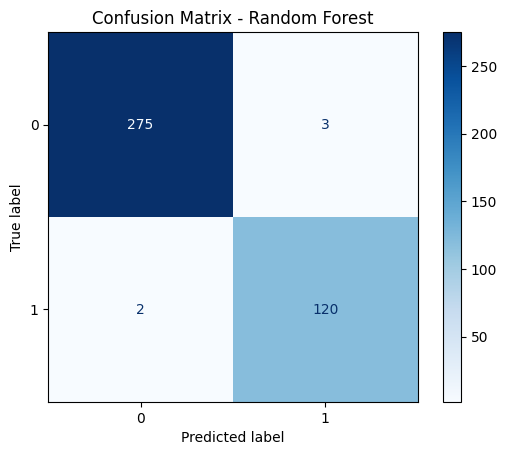

In [180]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [181]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy')

print("Akurasi Tiap Fold:", scores)
print("Rata-rata Akurasi :", np.mean(scores) * 100, "%")


Akurasi Tiap Fold: [0.99   0.98   0.98   0.9775 0.99  ]
Rata-rata Akurasi : 98.35000000000001 %


In [182]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy scores:", scores)
print("Mean Accuracy: %.2f%%" % (scores.mean() * 100))


Cross-validated accuracy scores: [0.98   0.975  0.9875 0.9825 0.9825]
Mean Accuracy: 98.15%


In [183]:
# Membulatkan semua nilai float menjadi 2 angka desimal
df_encoded = df_encoded.round(2)

# Tampilkan data hasil pembulatan
print("Data setelah pembulatan angka float:")
df_encoded.head()

Data setelah pembulatan angka float:


,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Cycle(R/I),Cycle length(days),Hip(inch),Waist(inch),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Waist:Hip Ratio
0,0,30,69.98,167.71,23.19,0,5,37,32,0,1,0,0,1,0.86
1,0,36,63.71,154.06,25.44,0,6,38,35,1,0,0,1,1,0.92
2,0,36,51.85,149.06,23.93,0,2,40,38,0,0,0,0,0,0.95
3,1,29,66.89,148.63,27.89,0,5,36,34,0,1,1,1,0,0.94
4,0,33,52.54,150.77,23.08,0,5,40,33,0,0,0,0,0,0.83


In [184]:
#Menampilan 15 data
df_encoded.sample(15, random_state=99)

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Cycle(R/I),Cycle length(days),Hip(inch),Waist(inch),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Waist:Hip Ratio
1414,0,35,59.45,152.51,25.77,0,5,39,33,0,0,0,0,0,0.85
1750,0,33,47.48,160.79,17.54,0,5,28,24,0,0,0,0,0,0.86
718,0,37,63.05,153.43,26.54,0,4,44,43,0,1,0,1,0,0.98
1203,1,33,60.60,162.74,22.49,0,5,40,32,1,1,0,1,1,0.80
304,0,29,50.47,152.98,22.22,0,5,38,34,0,0,1,0,0,0.89
780,0,31,53.96,161.66,21.09,0,5,37,34,0,0,0,1,1,0.92
1129,0,30,63.31,153.01,27.06,0,5,38,35,1,0,0,1,1,0.92
865,1,22,62.98,153.95,24.37,0,5,45,34,1,1,1,0,0,0.76
858,0,27,50.78,150.96,22.47,0,5,42,38,0,0,0,1,1,0.90
1544,1,29,77.65,157.60,27.92,0,3,42,38,1,0,1,1,1,0.90


In [185]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)  # contoh

# Simpan scaler
joblib.dump(scaler, "model_pcos.pkl")

# Simpan model
joblib.dump(model, 'model_pcos.pkl')
print("Model berhasil disimpan sebagai model_pcos.pkl")


Model berhasil disimpan sebagai model_pcos.pkl


In [186]:
# Muat model
model = joblib.load('model_pcos.pkl')
print("Model berhasil dimuat kembali")


Model berhasil dimuat kembali


In [187]:
#Masukkan data kamu di sini (dalam urutan kolom sesuai X)
# Format: [Age, Weight, Height, BMI, Cycle(R/I), Cycle length, Hip, Waist, Weight gain, Hair growth, Skin darkening, Hair loss, Pimples, Waist:Hip Ratio]

# Keterangan nilai untuk fitur biner:
# Cycle(R/I): 0 = Regular, 1 = Irregular
# Weight gain: 0 = Tidak, 1 = Ya
# Hair growth: 0 = Tidak, 1 = Ya
# Skin darkening: 0 = Tidak, 1 = Ya
# Hair loss: 0 = Tidak, 1 = Ya
# Pimples: 0 = Tidak, 1 = Ya

data_input = np.array([[31, 57.52, 158.83, 24.53, 0, 2, 39, 35, 0, 1, 1, 0, 1, 0.90]])

# Ubah menjadi DataFrame dengan nama kolom yang sesuai X.columns
input_df = pd.DataFrame(data_input, columns=X.columns)

# Standarisasi data input (gunakan scaler yang sama saat pelatihan)
input_scaled = scaler.transform(input_df)

# Prediksi menggunakan model, misalnya model rf_80_20
prediction = rf_80_20.predict(input_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [188]:
# Interpretasi hasil
if prediction[0] == 1:
    print("🔴 Berdasarkan data yang dimasukkan, terindikasi PCOS.")
else:
    print("🟢 Berdasarkan data yang dimasukkan, tidak terindikasi PCOS.")

🔴 Berdasarkan data yang dimasukkan, terindikasi PCOS.
